In [5]:
from sphviewer.tools import QuickVie

In [23]:
cd sphviewer/

/home/arodriguez/py-sphviewer/sphviewer


In [33]:
cd tesis/perfiles/

/home/arodriguez/tesis/perfiles


In [1]:
import numpy as np

In [2]:
t=np.loadtxt('insidevoid_dm.dat')

In [3]:
pos=t[:,:3]
pos = pos-250
x = pos[:,0]
y = pos[:,1]
z = pos[:,2]

m=np.ones(len(pos))

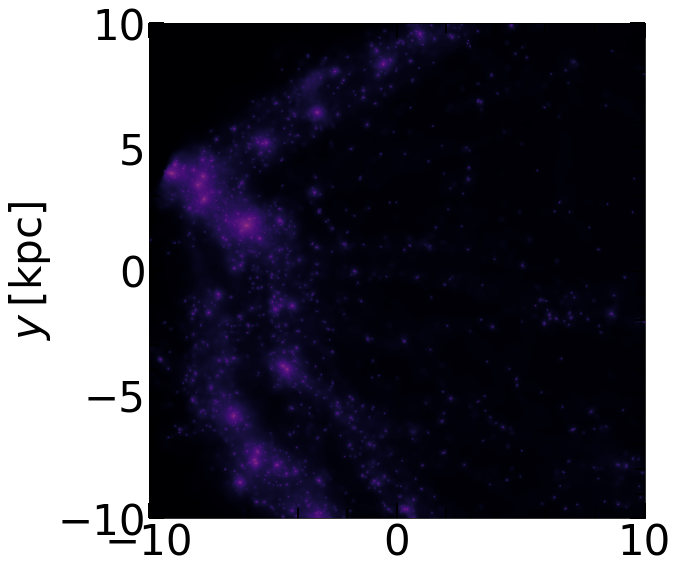

In [8]:
import sphviewer as sph
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

rl=10 
corte,=np.where((x <rl) & (y <rl) & (z <rl) & (x >-rl) & (y >-rl) & (z >-rl))

#-----rango que tiene la escala  de colores-----
vmin=0
vmax=6

# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='magma'

nb1 = 56 #suaviszado

npixel = 1000 #numero de pixeles



fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))# sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[2,5]})
fig.subplots_adjust(bottom=0.06, left =0.11, right = 0.97, top = 0.97, wspace=0., hspace= 0)

particles=sph.Particles(pos,m,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap, vmin=vmin, vmax= vmax)
ax.set_xlim(-rl,rl)
ax.set_ylim(-rl,rl)
ax.set_ylabel('$y\:\mathrm{[kpc]}$', fontsize=42)
ax.minorticks_on()
ax.tick_params( labelsize=42)
ax.tick_params('both', length=10, width=2, which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=15, width=2, which='major', direction='in', right='on',top='on')
plt.show()